# 機械学習スクラッチ　SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

In [3]:
import pandas as pd

In [9]:
import codecs

In [2]:
import os

In [58]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-3, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        
        #サポートベクターの数
        self.n_support_vectors = []
        #サポートベクターのインデックス
        self.index_support_vectors = []
        #サポートベクターの特徴量
        self.X_sv = []
        #サポートベクターの未定乗数
        self.lam_sv  = []
        #サポートベクターのラベル
        self.y_sv = []  
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.X = X
        y = np.where(y < 1, -1, 1)
        self.y = np.array(y).reshape(1,y.shape[0])
        #print(self.y .shape)
        #self.X_val = X_val
        #self.y_val = np.where(y_val  < 1, -1, 1)
        
        self.ramuda = np.random.normal(
                                                        loc   = 0,
                                                        scale = 1,
                                                        size  = self.X.shape[0]
                                                        ).reshape([1,self.X.shape[0]])*0.001
        #print(self.ramuda)
        #print(self.ramuda.shape)
        
        #self.ramuda更新
        for i in range(self.iter):
            self._gradient_descent(self.X,self.y) #67,67?
            #条件として、更新毎に λ i= 0 を満たす必要があります。満たさない場合は λ i = 0 とします。
            for j in range(self.X.shape[0]): #ラグランジュλを一つづつ見ていく
                if self.ramuda[0,j]< 0:
                    self.ramuda[0,j] = 0

                #print(len(self.index_support_vectors))
        #print(self.ramuda)
                    
        # 更新終わったら閾値でλを振り分け→Xサポートベクターの特徴量抜き出し[]に格納していく
        for m in range(self.X.shape[0]):
            if self.ramuda[0,m]> self.threshold: 
                self.X_sv.append(self.X[m])
                self.index_support_vectors.append(m)

        #インデックス番目のyを抜きだす
        for k in self.index_support_vectors:
            self.y_sv.append(y[k])#self.y_svに格納
        
        #サポートベクターの未定乗数
        for r in self.index_support_vectors:
            self.lam_sv.append(self.ramuda[0,r])
         
        
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
    
    
    def _kernel(self, X):
        return np.dot(X, X.T)
    
    def _gradient_descent(self, X, y):
        #print('ラムダ',self.ramuda.T.shape)
        grad = (1-y*np.sum(y*self.ramuda*self._kernel(X), axis=1))
        #grad = (1-np.dot(np.dot(y, y.T)*self._kernel(X), self.ramuda.T))
        #print('グラッド',grad.shape)
        self.ramuda = self.ramuda + self.lr*grad.T
        #print('ラムダ2',self.ramuda.shape)
        #print(self.ramuda)
        
       # return self.ramuda.T

    def predict(self, X):#X = X_test
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        
        #kernel
        #np.dot(X, self.X_sv.T)
        f = np.dot(np.dot(X, np.array(self.X_sv).T),(np.array(self.lam_sv )*np.array(self.y_sv)))
        return f

# 【問題1】ラグランジュの未定乗数法による最急降下

$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$

$
k(x_i, x_j) = x_{i}^{T} x_j
$

In [203]:
X = np.arange(8).reshape([4, 2])

In [204]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

カーネル関数

In [205]:
def kernel(X):
    return np.dot(X, X.T)

In [206]:
kernel(X)

array([[ 1,  3,  5,  7],
       [ 3, 13, 23, 33],
       [ 5, 23, 41, 59],
       [ 7, 33, 59, 85]])

In [207]:
y = np.random.randint(2, size=X.shape[0]).reshape([X.shape[0],1])

In [208]:
y

array([[0],
       [0],
       [0],
       [0]])

In [209]:
y.T

array([[0, 0, 0, 0]])

In [210]:
yiyj = np.dot(y, y.T)
yiyj

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [211]:
svm._gradient_descent(X,y)

ValueError: shapes (4,4) and (67,1) not aligned: 4 (dim 1) != 67 (dim 0)

In [ ]:
#ラグランジュ乗数 λ、正規分布作る
ramuda = np.random.normal(
                loc   = 0,
                scale = 1,
                size  = X.shape[0]
                ).reshape([1,X.shape[0]])*0.001

In [ ]:
ramuda

In [ ]:
yx = yiyj*kernel(X)
yx

In [ ]:
np.dot(np.dot(y, y.T)*kernel(X), ramuda.T)

In [ ]:
def gradient_descent(X,y):
    a = 2
    return a*(1-np.dot(np.dot(y, y.T)*kernel(X), ramuda.T))

In [ ]:
gradient_descent(X,y)

In [ ]:
ramuda_new = ramuda.T - gradient_descent(X,y)

ramuda_new

条件として、更新毎に 
λ
i
>=
0
を満たす必要があります。満たさない場合は 
λ
i
=
0
とします。

In [ ]:
for i in range(ramuda_new.shape[0]):
    if ramuda_new[i]< 0:
        ramuda_new[i] = 0       

In [ ]:
ramuda_new

In [ ]:
ramuda_new = np.arange(X.shape[0]).reshape([X.shape[0],1])
ramuda_new

# 【問題2】サポートベクターの決定

計算したラグランジュ乗数 λがルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。

閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [39]:
#閾値
#shiki = np.exp(-5)
shiki = 1

In [ ]:
sp_vec = []
index = []
for i in range(ramuda_new.shape[0]):
    if ramuda_new[i]> shiki:
        sp_vec.append(X[i])
        index.append(i)
        
    
    

In [ ]:
np.array(sp_vec)

In [ ]:
index

In [ ]:
sp_vec = np.array(sp_vec)
sp_vec

# 【問題3】推定

推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 
f
(
x
)
 の符号が分類結果です。
 $
 f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)
 $

x
 : 推定したいデータの特徴量ベクトル


N
 : サポートベクターの数


n
 : サポートベクターのインデックス


λ
n
 : 
n
番目のサポートベクターのラグランジュ乗数


y
s
v
n
 : 
n
番目のサポートベクターのラベル


k
(
)
 : カーネル関数


s
n
 : 
n
番目のサポートベクターの特徴量

In [ ]:
X_test = np.arange(8).reshape([4, 2])
X_test

In [ ]:
X_test.shape

In [ ]:
#kernel
np.dot(X_test, sp_vec.T)

In [ ]:
index[0]

In [ ]:
index

In [ ]:
yy = []
for k in index:
    yy.append(y[k])
    
    

In [ ]:
yy

In [ ]:
#yy
np.array(yy)

In [ ]:
ramuda = []
for r in index:
    ramuda.append(ramuda_new[r])

In [ ]:
##ramuyda_n
np.array(ramuda)

In [ ]:
np.array(ramuda)*np.array(yy)

In [ ]:
#f(x) 距離を表ている　符号で０or1をラベリングできるように今後　np.where等
np.dot(np.dot(X_test, sp_vec.T),(np.array(ramuda)*np.array(yy)))

In [ ]:

np.where(r < 1, -1, 1)

# 【問題4】学習と推定

機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# X = X[['sepal_length','petal_length']]
# y = pd.DataFrame(iris.target, columns=['Species'])
# df = pd.concat([X, y], axis=1)
# df = df[df.Species.isin([1,2])].reset_index(drop=True)
# df.loc[df.Species == 2, 'Species'] = 0 
# y = df.Species
# del df['Species']

# from sklearn.model_selection import train_test_split
# train, val_train, y_train, y_val = train_test_split(np.array(df), np.array(y), test_size=0.33, random_state=42)


# svm1 = ScratchSVMClassifier(10000,0.005)

In [4]:
# svm.fit(train, y_train)

In [155]:
# svm.index_support_vectors


In [156]:
# svm.predict(train)

In [64]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_test = np.concatenate((f0, f1))
y_test = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_ = X_test[random_index]
y_ = y_test[random_index]

svm = ScratchSVMClassifier(10000 ,0.0001) #10000,0.0001

In [65]:
svm.fit(X_, y_)

In [66]:
svm.ramuda

array([[ 6.78736267e-04,  1.23980227e-03,  5.63365477e-04, ...,
         9.56921917e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.19702581e-03,  1.75809182e-03,  1.08165502e-03, ...,
         1.47521146e-03, -2.38271612e-04, -6.75190605e-04],
       [ 1.07961086e-03,  1.64067686e-03,  9.64240065e-04, ...,
         1.35779651e-03, -3.55686571e-04, -7.92605564e-04],
       ...,
       [ 1.34512960e-03,  1.90619560e-03,  1.22975881e-03, ...,
         1.62331525e-03, -9.01678289e-05, -5.27086822e-04],
       [ 1.16927402e-03,  1.73034002e-03,  1.05390323e-03, ...,
         1.44745967e-03, -2.66023410e-04, -7.02942402e-04],
       [ 1.37689165e-03,  1.93795766e-03,  1.26152086e-03, ...,
         1.65507730e-03, -5.84057746e-05, -4.95324767e-04]])

In [67]:
svm.index_support_vectors

[1,
 4,
 6,
 14,
 18,
 26,
 35,
 39,
 41,
 65,
 66,
 67,
 70,
 79,
 80,
 87,
 89,
 93,
 95,
 102,
 104,
 106,
 107,
 110,
 121,
 130,
 134,
 145,
 155,
 162,
 167,
 187,
 199,
 200,
 201,
 202,
 204,
 205,
 210,
 222,
 228,
 229,
 235,
 243,
 249,
 250,
 251,
 259,
 266,
 270,
 276,
 280,
 282,
 284,
 285,
 289,
 290,
 301,
 302,
 327,
 333,
 334,
 335,
 343,
 349,
 351,
 354,
 356,
 357,
 360,
 361,
 368,
 370,
 382,
 383,
 394,
 396,
 397,
 415,
 418,
 422,
 425,
 426,
 428,
 429,
 434,
 455,
 457,
 460,
 464,
 465,
 477,
 481,
 487]

# 【問題5】決定領域の可視化

決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [68]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(X[svm.index_support_vectors,0], X[svm.index_support_vectors,1],s=80, marker='o', color='y')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [69]:
svm.ramuda

array([[ 6.78736267e-04,  1.23980227e-03,  5.63365477e-04, ...,
         9.56921917e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.19702581e-03,  1.75809182e-03,  1.08165502e-03, ...,
         1.47521146e-03, -2.38271612e-04, -6.75190605e-04],
       [ 1.07961086e-03,  1.64067686e-03,  9.64240065e-04, ...,
         1.35779651e-03, -3.55686571e-04, -7.92605564e-04],
       ...,
       [ 1.34512960e-03,  1.90619560e-03,  1.22975881e-03, ...,
         1.62331525e-03, -9.01678289e-05, -5.27086822e-04],
       [ 1.16927402e-03,  1.73034002e-03,  1.05390323e-03, ...,
         1.44745967e-03, -2.66023410e-04, -7.02942402e-04],
       [ 1.37689165e-03,  1.93795766e-03,  1.26152086e-03, ...,
         1.65507730e-03, -5.84057746e-05, -4.95324767e-04]])

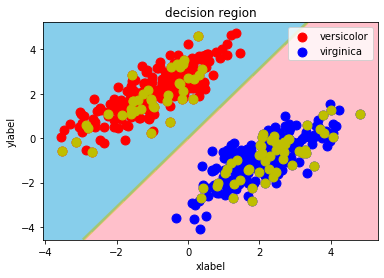

In [70]:
decision_region(X_, y_, svm, title="decision region")